## Machine Learning

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
import os
#from plotly import plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Flatten,Reshape
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
import csv
from tensorflow.keras.models import Model
#import keras
from tensorflow.keras import backend as k
from tensorflow.keras.layers import Input,Concatenate,Dropout,Dense,BatchNormalization,Conv1D
from tensorflow.keras.layers import Input
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#from tensorflow.keras.merge import concatenate
#import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import scipy
from tensorflow.keras.initializers import he_normal,glorot_normal
from tensorflow.keras.regularizers import l1,l2
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint,LearningRateScheduler,ReduceLROnPlateau
from time import time
from tensorflow.keras.utils import plot_model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
data=pd.read_csv('/content/gdrive/MyDrive/Case Study-2(Sarcastic Comments-REDDIT)/train-balanced-sarcasm.csv')
data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [ ]:
data.isnull().sum()

label              0
comment           53
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [ ]:
data['comment']=data['comment'].fillna('No Comment')

In [ ]:
# Remove Emoji
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [ ]:
def decontractions(phrase):
    """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)

    return phrase

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from tqdm import tqdm
import re
stopwords = stopwords.words('english')
def preprocess(text_col,stopword):
    preprocessed = []
    for sentence in tqdm(text_col.values):
        # Replace "carriage return" with "space".
        sentence=str(sentence)
        sent = sentence.replace('\\r', ' ')
        # Replace "quotes" with "space".
        sent = sent.replace('\\"', ' ')
        # Replace "line feed" with "space".
        sent = sent.replace('\\n', ' ')
        # Replace characters between words with "space".
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        #remove stop words
        #decontraction
        sent=decontractions(sent)
        #Remove emoji
        sent=deEmojify(sent)
        if stopword:
            sent = ' '.join(e for e in sent.split() if e not in stopwords)
        else:
           sent = ' '.join(e for e in sent.split())
        # to lowercase
        preprocessed.append(sent.lower().strip())
    return preprocessed

In [ ]:
data['comment']=preprocess(data['comment'],stopword=False)

100%|██████████| 1010826/1010826 [00:25<00:00, 39170.14it/s]


In [ ]:
data['parent_comment']=preprocess(data['parent_comment'],stopword=False)

100%|██████████| 1010826/1010826 [00:32<00:00, 30761.52it/s]


In [ ]:
data.isnull().sum()

label             0
comment           0
author            0
subreddit         0
score             0
ups               0
downs             0
date              0
created_utc       0
parent_comment    0
dtype: int64

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Polarity Score

In [ ]:
import nltk
from tqdm import tqdm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def generate_sentiment_scores(data):
    sid = SentimentIntensityAnalyzer()
    neg=[]
    pos=[]
    neu=[]
    comp=[]
    for sentence in tqdm(data['parent_comment'].values): 
        sentence_sentiment_score = sid.polarity_scores(sentence)
        comp.append(sentence_sentiment_score['compound'])
        neg.append(sentence_sentiment_score['neg'])
        pos.append(sentence_sentiment_score['pos'])
        neu.append(sentence_sentiment_score['neu'])
    return comp,neg,pos,neu

In [ ]:
data['compound'],data['negative'],data['positive'],data['neutral']=generate_sentiment_scores(data)

100%|██████████| 1010826/1010826 [04:23<00:00, 3832.90it/s]


In [ ]:
data['com_len']=data['comment'].apply(lambda x:len(x.split()))

In [ ]:
data['parent_com_len']=data['parent_comment'].apply(lambda x:len(x.split()))

In [ ]:
data['comment']=data['comment']+" "+data['author']+" "+data['subreddit']

In [ ]:
labels=tf.keras.utils.to_categorical(data['label'].values,num_classes=2)
labels.shape

(1010826, 2)

In [ ]:
y=data['label']
X=data.drop(['label','date','created_utc'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,labels,test_size=0.3,random_state=42,stratify=labels)

In [ ]:
def pad_text(text,tokenizer,max_len):
    return pad_sequences(tokenizer.texts_to_sequences(text),maxlen=max_len,padding='post')

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
def text_padding(train,test,max_len):
    token=Tokenizer()
    token.fit_on_texts(train)
    padded_train_text=pad_text(train,token,max_len)
    padded_test_text=pad_text(test,token,max_len)
    return padded_train_text,padded_test_text,token

In [ ]:
comm_len=200
train_com_pad,test_com_pad,token_com= text_padding(X_train['comment'],X_test['comment'],comm_len)

In [ ]:
print(train_com_pad.shape,test_com_pad.shape)

(707578, 200) (303248, 200)


In [ ]:
par_comm_len=200
train_par_com_pad,test_par_com_pad,token_par= text_padding(X_train['parent_comment'],X_test['parent_comment'],par_comm_len)

In [ ]:
print(train_par_com_pad.shape,test_par_com_pad.shape)

(707578, 200) (303248, 200)


In [ ]:
def generate_embedding_matrix(token):
    embedding_path='/content/gdrive/MyDrive/Mercari/glove.6B.100d.txt'
    embedding_dimension=100
    embedding_index={}
    with open(embedding_path,encoding="latin") as f:
         for line in f:
             values=line.split()
             word=values[0]
             coefs=np.asarray(values[1:],dtype='float32')
             embedding_index[word]=coefs
    f.close()        
    embedding_matrix=np.zeros((len(token.word_index)+1,embedding_dimension))
    num_words_in_embedding = 0
    for word, i in token.word_index.items():
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
           num_words_in_embedding += 1
        embedding_matrix[i] = embedding_vector
        #print("embedding matrix shape",embedding_matrix.shape)
    return embedding_matrix

In [ ]:
embedding_comm = generate_embedding_matrix(token_com)
embedding_par = generate_embedding_matrix(token_par)
print(embedding_comm.shape,embedding_par.shape)

(362500, 100) (189737, 100)


In [ ]:
%%time
from sklearn.preprocessing import Normalizer
trans = Normalizer()
X_train_score=trans.fit_transform(X_train['score'].values.reshape(-1,1))
X_test_score=trans.transform(X_test['score'].values.reshape(-1,1))

CPU times: user 16.9 ms, sys: 0 ns, total: 16.9 ms
Wall time: 16.2 ms


In [ ]:
%%time
trans = Normalizer()
X_train_ups=trans.fit_transform(X_train['ups'].values.reshape(-1,1))
X_test_ups=trans.transform(X_test['ups'].values.reshape(-1,1))

CPU times: user 14.7 ms, sys: 2.01 ms, total: 16.7 ms
Wall time: 17 ms


In [ ]:
%%time
trans = Normalizer()
X_train_downs=trans.fit_transform(X_train['downs'].values.reshape(-1,1))
X_test_downs=trans.transform(X_test['downs'].values.reshape(-1,1))

CPU times: user 14.4 ms, sys: 1.99 ms, total: 16.4 ms
Wall time: 18 ms


In [ ]:
%%time
trans = Normalizer()
X_train_comp=trans.fit_transform(X_train['compound'].values.reshape(-1,1))
X_test_comp=trans.transform(X_test['compound'].values.reshape(-1,1))

CPU times: user 13.5 ms, sys: 7.01 ms, total: 20.5 ms
Wall time: 23.2 ms


In [ ]:
%%time
trans = Normalizer()
X_train_neg=trans.fit_transform(X_train['negative'].values.reshape(-1,1))
X_test_neg=trans.transform(X_test['negative'].values.reshape(-1,1))

CPU times: user 17.3 ms, sys: 4 ms, total: 21.3 ms
Wall time: 22.2 ms


In [ ]:
%%time
trans = Normalizer()
X_train_pos=trans.fit_transform(X_train['positive'].values.reshape(-1,1))
X_test_pos=trans.transform(X_test['positive'].values.reshape(-1,1))

CPU times: user 20.4 ms, sys: 994 µs, total: 21.4 ms
Wall time: 22.7 ms


In [ ]:
%%time
trans = Normalizer()
X_train_neu=trans.fit_transform(X_train['neutral'].values.reshape(-1,1))
X_test_neu=trans.transform(X_test['neutral'].values.reshape(-1,1))

CPU times: user 14.7 ms, sys: 997 µs, total: 15.7 ms
Wall time: 16 ms


In [ ]:
%%time
trans = Normalizer()
X_train_com_len=trans.fit_transform(X_train['com_len'].values.reshape(-1,1))
X_test_com_len=trans.transform(X_test['com_len'].values.reshape(-1,1))

CPU times: user 14.4 ms, sys: 38 µs, total: 14.4 ms
Wall time: 15 ms


In [ ]:
%%time
trans = Normalizer()
X_train_parent_com_len=trans.fit_transform(X_train['parent_com_len'].values.reshape(-1,1))
X_test_parent_com_len=trans.transform(X_test['parent_com_len'].values.reshape(-1,1))

CPU times: user 11.9 ms, sys: 3.02 ms, total: 14.9 ms
Wall time: 19.8 ms


In [ ]:
numerical_train=np.concatenate((X_train_score,X_train_ups,X_train_downs,X_train_comp,X_train_neu,X_train_neg,X_train_pos,X_train_com_len,X_train_parent_com_len),axis=1)
numerical_test=np.concatenate((X_test_score,X_test_ups,X_test_downs,X_test_comp,X_test_neu,X_test_neg,X_test_pos,X_test_com_len,X_test_parent_com_len),axis=1)

In [ ]:
print(numerical_train.shape,numerical_test.shape)

(707578, 9) (303248, 9)


In [ ]:
X_train=[train_com_pad,train_par_com_pad,numerical_train]
X_test=[test_com_pad,test_par_com_pad,numerical_test]

In [ ]:
from tensorflow.keras.layers import concatenate
def LSTM_Model(comm_len,token_com,par_comm_len,token_par):
    drop_lstm = 0.25
    drop_dense = 0.25
    num_lstm=150
    print('0____________')
    input_text_1=Input(shape=(comm_len,), name='Comment')
    sequence_input_1=Embedding(len(token_com.word_index) + 1,100,weights=[embedding_comm],input_length=comm_len,trainable=True,dtype=tf.float32)(input_text_1)
    sequence_input_1=LSTM(num_lstm,dropout=drop_lstm,return_sequences=True,dtype=tf.float32)(sequence_input_1)
    sequence_input_1=Flatten()(sequence_input_1)
    print('1____________')
    input_text_2=Input(shape=(par_comm_len,),name='parent_comment')
    sequence_input_2=Embedding(len(token_par.word_index) + 1,100,weights=[embedding_par],input_length=par_comm_len,trainable=True,dtype=tf.float32)(input_text_2)
    sequence_input_2=LSTM(num_lstm,dropout=drop_lstm,return_sequences=True,dtype=tf.float32)(sequence_input_2)
    sequence_input_2=Flatten()(sequence_input_2)
    
    print('5____________')
    input5 = Input(shape=(9,),name='Numerical')
    flatten_6 = Dense(32,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001),dtype=tf.float32)(input5)
    flatten_6 = Dense(16,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001),dtype=tf.float32)(flatten_6)
    concat=concatenate([sequence_input_1,sequence_input_2,flatten_6],dtype=tf.float32)
    print('6____________')
    y = Dense(128,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.01))(concat)
    y = Dense(64,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.01))(y)
    y = Dense(32,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.01))(y)
    print('7____________')
    final_output=Dense(2,activation='softmax')(y)
    print('8____________')
    model= Model(inputs=[input_text_1,input_text_2,input5],outputs=final_output)
    return model

In [ ]:
model=LSTM_Model(comm_len,token_com,par_comm_len,token_par)
model.summary()

0____________
1____________
5____________
6____________
7____________
8____________
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Comment (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
parent_comment (InputLayer)     [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 200, 100)     36250000    Comment[0][0]                    
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 200, 100)     18973700    parent_comment[0][0]             
________

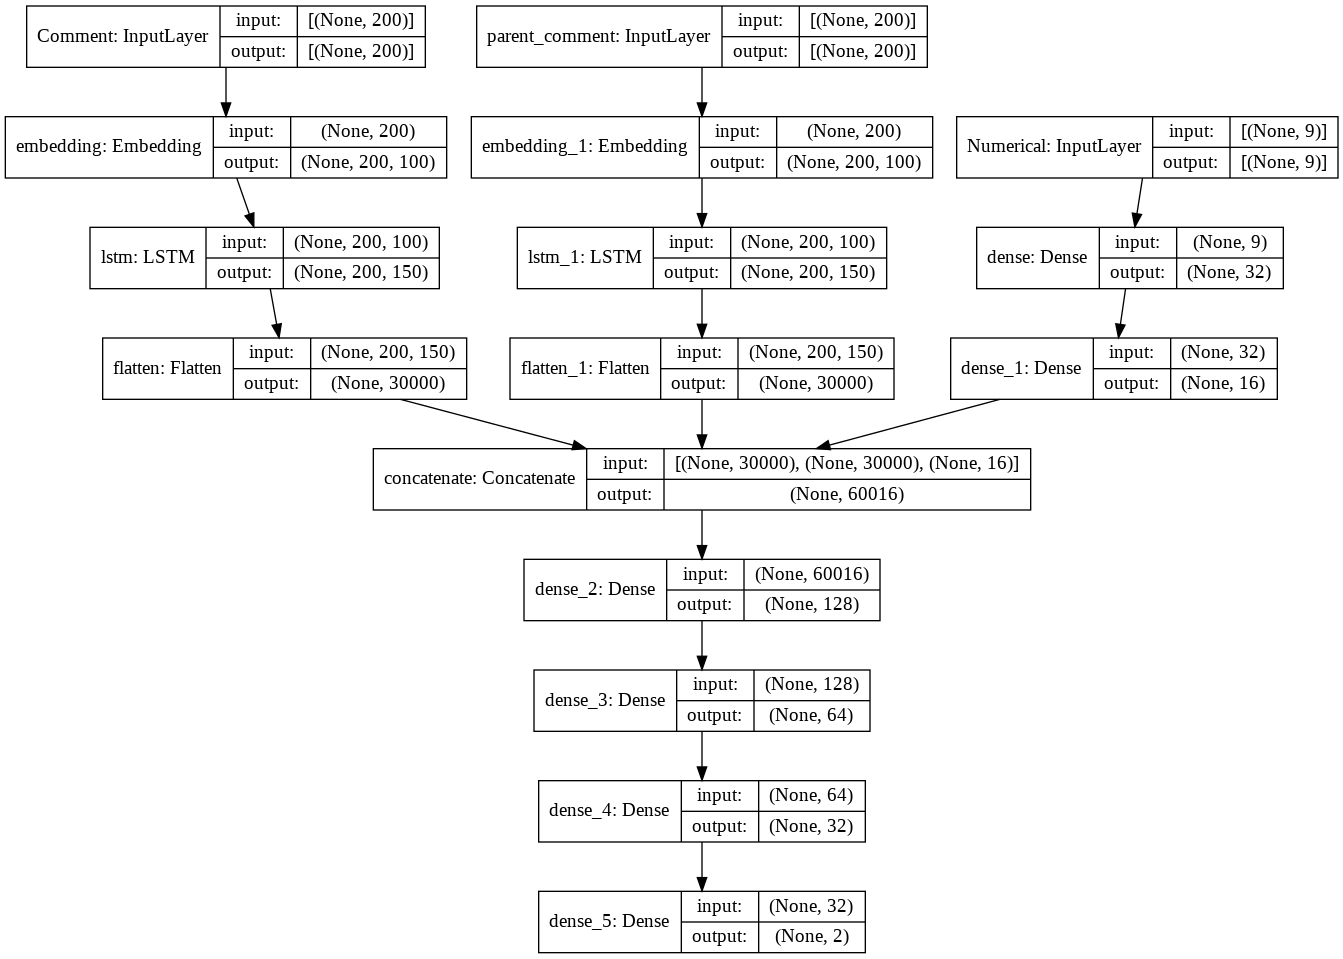

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB')

In [ ]:
from sklearn.metrics import roc_auc_score
def auc1(y_true, y_pred):
    if len(np.unique(y_true[:,1])) == 1:
        return 0.5
    else:
        return roc_auc_score(y_true, y_pred)
def auroc(y_true, y_pred):
    return tf.py_function(auc1, (y_true, y_pred), tf.double)

In [ ]:
import tensorflow as tf
adam = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import *
import os
filepath="weights_1.best.hdf1"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, mode='max')
earlystop = EarlyStopping(monitor = 'val_accuracy',  mode="max",min_delta = 0, patience = 3,verbose = 1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.25, patience = 2, verbose = 1)
%reload_ext tensorboard
import datetime
logdir = os.path.join("logs_1", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
tensorboard = TensorBoard(log_dir=logdir, histogram_freq=0, write_graph=True, write_grads=False, write_images=False)
callbacks = [checkpoint,reduce_lr,tensorboard,earlystop]

In [ ]:
hitory=model.fit(x=X_train,y=y_train,epochs=50,batch_size=512,validation_data=(X_test, y_test),callbacks=callbacks)

Epoch 1/50
 114/1382 [=>............................] - ETA: 2:52 - loss: nan - accuracy: 0.5008

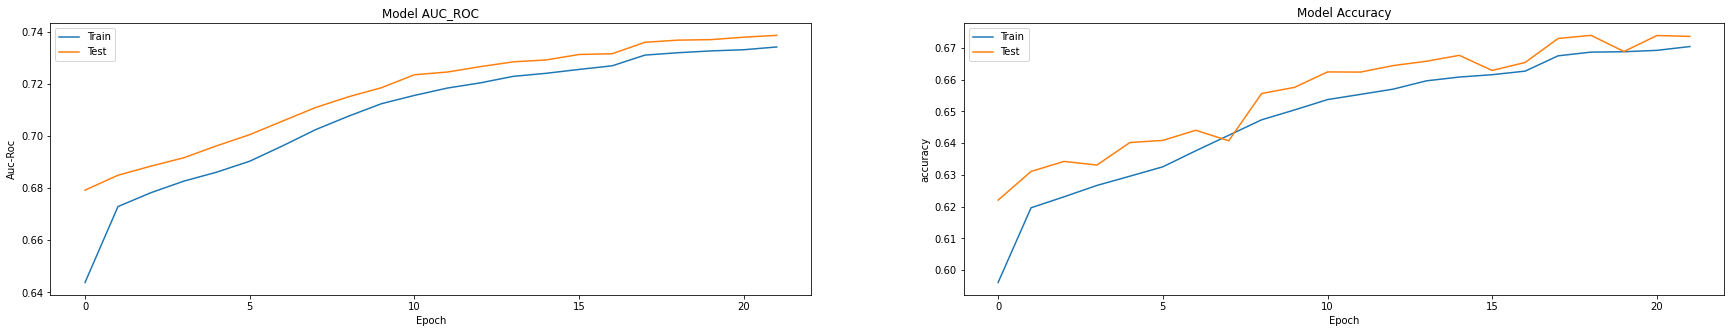

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(hitory.history['auroc'])
plt.plot(hitory.history['val_auroc'])
plt.title('Model AUC_ROC')
plt.ylabel('Auc-Roc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation f1_score
plt.subplot(122)
plt.plot(hitory.history['accuracy'])
plt.plot(hitory.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.layers import concatenate
def LSTM_Model1(comm_len,token_com,par_comm_len,token_par):
    drop_lstm = 0.25
    drop_dense = 0.25
    num_lstm=150
    print('0____________')
    input_text_1=Input(shape=(comm_len,), name='Comment', dtype='float32')
    sequence_input_1=Embedding(len(token_com.word_index) + 1,100,input_length=comm_len,trainable=False,dtype=tf.float32)(input_text_1)
    sequence_input_1=LSTM(num_lstm,dropout=drop_lstm,return_sequences=True,dtype=tf.float32)(sequence_input_1)
    sequence_input_1=Flatten()(sequence_input_1)
    print('1____________')
    input_text_2=Input(shape=(par_comm_len,),name='parent_comment', dtype='float32')
    sequence_input_2=Embedding(len(token_par.word_index) + 1,100,input_length=par_comm_len,trainable=False,dtype=tf.float32)(input_text_2)
    sequence_input_2=LSTM(num_lstm,dropout=drop_lstm,return_sequences=True,dtype=tf.float32)(sequence_input_2)
    sequence_input_2=Flatten()(sequence_input_2)
    
    print('5____________')
    input5 = Input(shape=(9,),name='Numerical', dtype='float32')
    flatten_6 = Dense(32,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001),dtype=tf.float32)(input5)
    flatten_6 = Dense(16,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001),dtype=tf.float32)(flatten_6)
    concat=concatenate([sequence_input_1,sequence_input_2,flatten_6],dtype=tf.float32)
    print('6____________')
    y = Dense(512,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.01))(concat)
    y=Dropout(0.4)(y)
    y = Dense(256,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.01))(y)
    y=Dropout(0.4)(y)
    y = Dense(64,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.01))(y)
    print('7____________')
    final_output=Dense(2,activation='softmax')(y)
    print('8____________')
    model= Model(inputs=[input_text_1,input_text_2,input5],outputs=final_output)
    return model

In [ ]:
model1=LSTM_Model1(comm_len,token_com,par_comm_len,token_par)
model1.summary()

0____________
1____________
5____________
6____________
7____________
8____________
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Comment (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
parent_comment (InputLayer)     [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 200, 100)     36250000    Comment[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 200, 100)     18973700    parent_comment[0][0]             
________

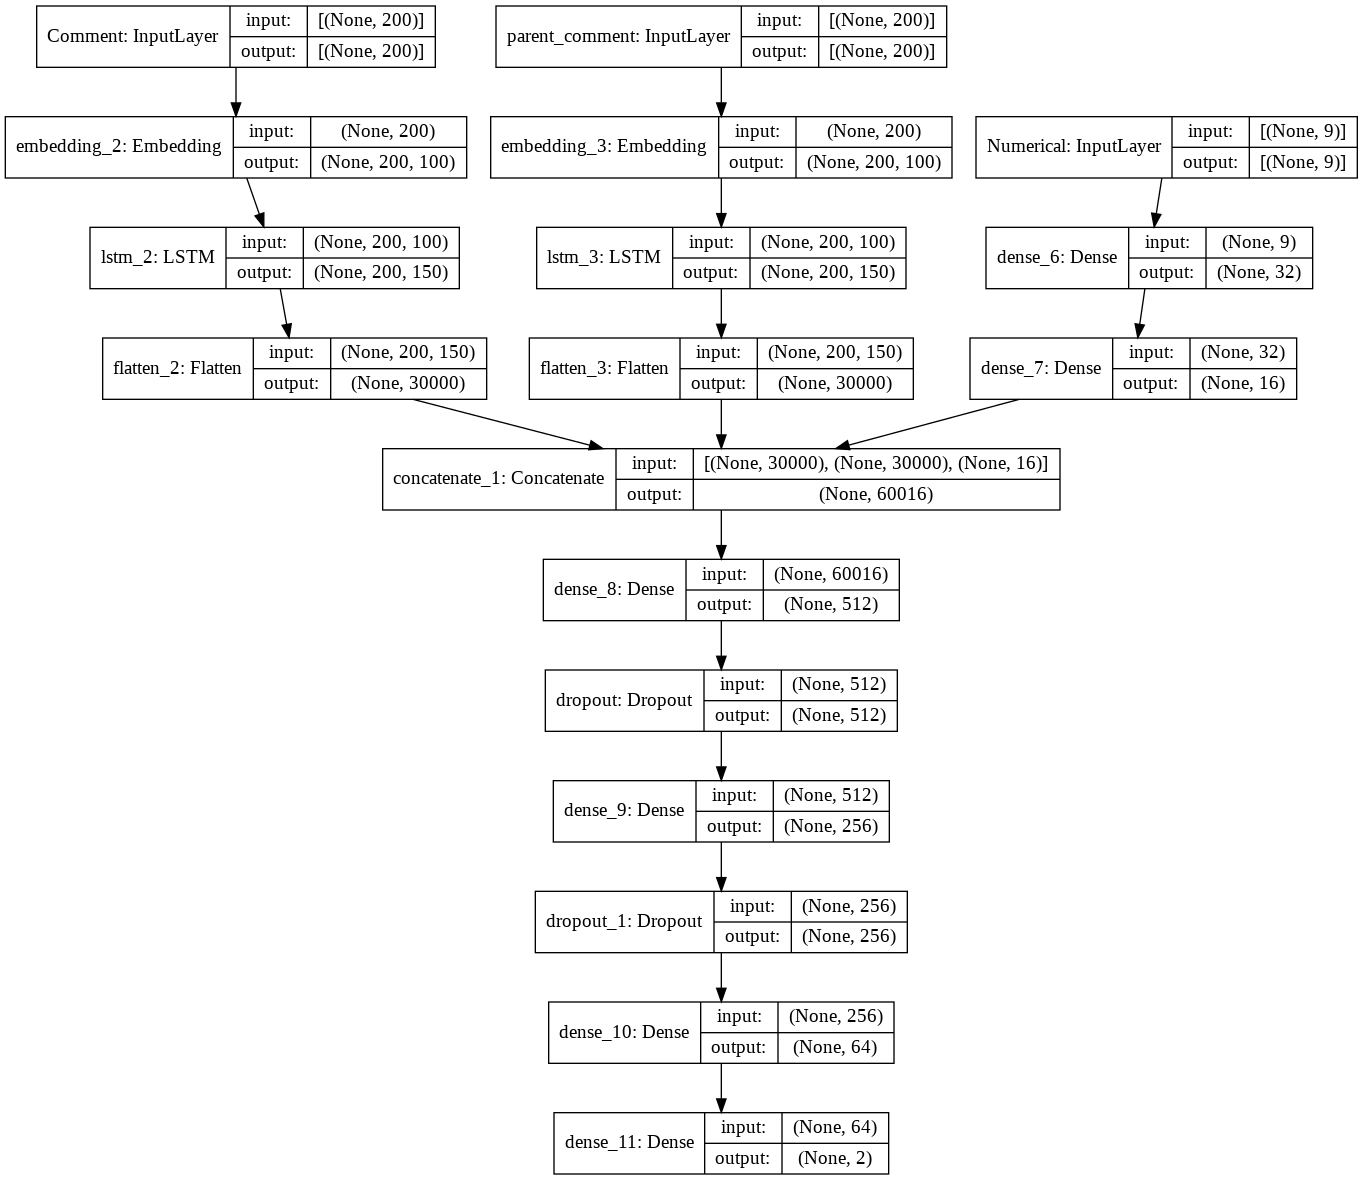

In [ ]:
tf.keras.utils.plot_model(
    model1, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB')

In [ ]:
import tensorflow as tf
adam = tf.keras.optimizers.Adam(lr=0.0001)
model1.compile(optimizer=adam, loss='categorical_crossentropy',metrics=[auroc,'accuracy'])

In [ ]:
from tensorflow.keras.callbacks import *
import os
filepath="weights_2.best.hdf1"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, mode='max')
earlystop = EarlyStopping(monitor = 'val_accuracy',  mode="max",min_delta = 0, patience = 3,verbose = 1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.25, patience = 2, verbose = 1)
%reload_ext tensorboard
import datetime
logdir = os.path.join("logs_2", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
tensorboard = TensorBoard(log_dir=logdir, histogram_freq=0, write_graph=True, write_grads=False, write_images=False)
callbacks = [checkpoint,reduce_lr,tensorboard,earlystop]

In [ ]:
hitory=model1.fit(x=X_train,y=y_train,epochs=50,batch_size=1024,validation_data=(X_test, y_test),callbacks=callbacks)

Epoch 1/50
691/691 [==============================] - 220s 313ms/step - loss: 4.2409 - auroc: 0.6209 - accuracy: 0.5847 - val_loss: 1.8162 - val_auroc: 0.6678 - val_accuracy: 0.6163

Epoch 00001: saving model to weights_2.best.hdf1


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


Epoch 2/50
691/691 [==============================] - 222s 322ms/step - loss: 1.1984 - auroc: 0.6606 - accuracy: 0.6141 - val_loss: 0.8372 - val_auroc: 0.6770 - val_accuracy: 0.6238

Epoch 00002: saving model to weights_2.best.hdf1


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


Epoch 3/50
691/691 [==============================] - 207s 300ms/step - loss: 0.7404 - auroc: 0.6670 - accuracy: 0.6179 - val_loss: 0.6786 - val_auroc: 0.6835 - val_accuracy: 0.6290

Epoch 00003: saving model to weights_2.best.hdf1


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


Epoch 4/50
691/691 [==============================] - 224s 324ms/step - loss: 0.6685 - auroc: 0.6726 - accuracy: 0.6214 - val_loss: 0.6552 - val_auroc: 0.6859 - val_accuracy: 0.6320

Epoch 00004: saving model to weights_2.best.hdf1


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


Epoch 5/50
691/691 [==============================] - 223s 323ms/step - loss: 0.6572 - auroc: 0.6764 - accuracy: 0.6236 - val_loss: 0.6498 - val_auroc: 0.6880 - val_accuracy: 0.6306

Epoch 00005: saving model to weights_2.best.hdf1


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


Epoch 6/50
691/691 [==============================] - 207s 300ms/step - loss: 0.6536 - auroc: 0.6795 - accuracy: 0.6258 - val_loss: 0.6454 - val_auroc: 0.6906 - val_accuracy: 0.6360

Epoch 00006: saving model to weights_2.best.hdf1


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


Epoch 7/50
691/691 [==============================] - 224s 324ms/step - loss: 0.6509 - auroc: 0.6823 - accuracy: 0.6276 - val_loss: 0.6461 - val_auroc: 0.6944 - val_accuracy: 0.6385

Epoch 00007: saving model to weights_2.best.hdf1


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


Epoch 8/50
691/691 [==============================] - 223s 323ms/step - loss: 0.6488 - auroc: 0.6848 - accuracy: 0.6300 - val_loss: 0.6430 - val_auroc: 0.6962 - val_accuracy: 0.6393

Epoch 00008: saving model to weights_2.best.hdf1


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


Epoch 9/50
691/691 [==============================] - 223s 323ms/step - loss: 0.6453 - auroc: 0.6891 - accuracy: 0.6334 - val_loss: 0.6389 - val_auroc: 0.7002 - val_accuracy: 0.6425

Epoch 00009: saving model to weights_2.best.hdf1


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


Epoch 10/50
691/691 [==============================] - 223s 323ms/step - loss: 0.6417 - auroc: 0.6946 - accuracy: 0.6375 - val_loss: 0.6331 - val_auroc: 0.7066 - val_accuracy: 0.6473

Epoch 00010: saving model to weights_2.best.hdf1


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


Epoch 11/50
691/691 [==============================] - 223s 323ms/step - loss: 0.6375 - auroc: 0.7002 - accuracy: 0.6416 - val_loss: 0.6343 - val_auroc: 0.7099 - val_accuracy: 0.6433

Epoch 00011: saving model to weights_2.best.hdf1


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


Epoch 12/50
691/691 [==============================] - 223s 323ms/step - loss: 0.6343 - auroc: 0.7046 - accuracy: 0.6452 - val_loss: 0.6325 - val_auroc: 0.7100 - val_accuracy: 0.6472

Epoch 00012: saving model to weights_2.best.hdf1


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets



Epoch 00012: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
Epoch 13/50
691/691 [==============================] - 223s 323ms/step - loss: 0.6275 - auroc: 0.7106 - accuracy: 0.6517 - val_loss: 0.6228 - val_auroc: 0.7175 - val_accuracy: 0.6573

Epoch 00013: saving model to weights_2.best.hdf1


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


Epoch 14/50
691/691 [==============================] - 223s 323ms/step - loss: 0.6259 - auroc: 0.7123 - accuracy: 0.6531 - val_loss: 0.6216 - val_auroc: 0.7193 - val_accuracy: 0.6575

Epoch 00014: saving model to weights_2.best.hdf1


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


Epoch 15/50
691/691 [==============================] - 223s 323ms/step - loss: 0.6254 - auroc: 0.7133 - accuracy: 0.6533 - val_loss: 0.6197 - val_auroc: 0.7210 - val_accuracy: 0.6606

Epoch 00015: saving model to weights_2.best.hdf1


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


Epoch 16/50
691/691 [==============================] - 223s 323ms/step - loss: 0.6245 - auroc: 0.7142 - accuracy: 0.6544 - val_loss: 0.6199 - val_auroc: 0.7215 - val_accuracy: 0.6584

Epoch 00016: saving model to weights_2.best.hdf1


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


Epoch 17/50
691/691 [==============================] - 223s 323ms/step - loss: 0.6234 - auroc: 0.7154 - accuracy: 0.6556 - val_loss: 0.6189 - val_auroc: 0.7221 - val_accuracy: 0.6607

Epoch 00017: saving model to weights_2.best.hdf1


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


Epoch 18/50
691/691 [==============================] - 223s 323ms/step - loss: 0.6233 - auroc: 0.7159 - accuracy: 0.6556 - val_loss: 0.6180 - val_auroc: 0.7227 - val_accuracy: 0.6618

Epoch 00018: saving model to weights_2.best.hdf1


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


Epoch 19/50
691/691 [==============================] - 207s 300ms/step - loss: 0.6222 - auroc: 0.7170 - accuracy: 0.6570 - val_loss: 0.6202 - val_auroc: 0.7216 - val_accuracy: 0.6588

Epoch 00019: saving model to weights_2.best.hdf1


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


INFO:tensorflow:Assets written to: weights_2.best.hdf1/assets


Epoch 20/50
119/691 [====>.........................] - ETA: 2:31 - loss: 0.6220 - auroc: 0.7171 - accuracy: 0.6564

KeyboardInterrupt: ignored